# Anomaly Detection in Credit Card Transactions

The nature of credit card transactions was determined using gaussian models. A few combinations of models including univariate and multivariate distributions were used. The features that best depict the dataset were determined. Finally, a **custom multivariate gaussian mixture model** was used to detect anomalies.

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget
wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar.gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
#printing first few columns of df

df.iloc[:,0:10]
# df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739
...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087


In [ ]:
print('Number of rows:',df.shape[0],'\n')
print('Columns:',df.columns.values,'\n')
print('Target values:',df.Class.unique())
print('Target value counts:', np.array(df['Class'].value_counts()))

Number of rows: 284807 

Columns: ['Time' 'V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12'
 'V13' 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24'
 'V25' 'V26' 'V27' 'V28' 'Amount' 'Class'] 

Target values: [0 1]
Target value counts: [284315    492]


**Some Observations**

Valid entries = 99.8273%, Fraud entries = 0.1727%.

This data is considered as unbalanced as different target classes have an uneven number of entries. The proportion of valid transactions is significantly higher than the proportion of fraudulent transactions (which is less than 1% of the total data.) Balance is very important beacuse training a model with unbalanced data will make it biased in favour of the majority class. This is beacuse, in an unbalanced data set, due to the lower proportion of the minority class, the model won't have enough information/examples to learn accurately from it. In the case of KNN classifier, when unbalanced data is used, it is highly likely that the model will predict the outcome to be the majority class, simply due to its higher proportion. So, there is a high chance of misclassification. In such cases, instead of accuracy metrics such as Precision, Recall and F1 Score and ROC/AUC can be used.

In [ ]:
target_counts = df['Class'].value_counts()
target_counts = np.array(target_counts)

print ('Percentage of valid entries: {:.4f} %'.format(target_counts[0]/sum(target_counts)*100))
print ('Percentage of fraud entries: {:.4f} %'.format(target_counts[1]/sum(target_counts)*100))

Percentage of valid entries: 99.8273 %
Percentage of fraud entries: 0.1727 %


In [ ]:
# splitting the data

X = df.drop(['Class'], axis = 1)
y = df['Class']

# splitting out 15% of the total data for the test set
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size = 0.15, random_state = 40)

# spitting the remaining 85% into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size = 0.23529, random_state = 40)    # test_size = 0.2/0.85 

print(X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape)


(185124, 30) (56961, 30) (42722, 30) (185124,) (56961,) (42722,)


Looking at the difference in distribution for some variables between fraudulent and non-fraudulent transactions:

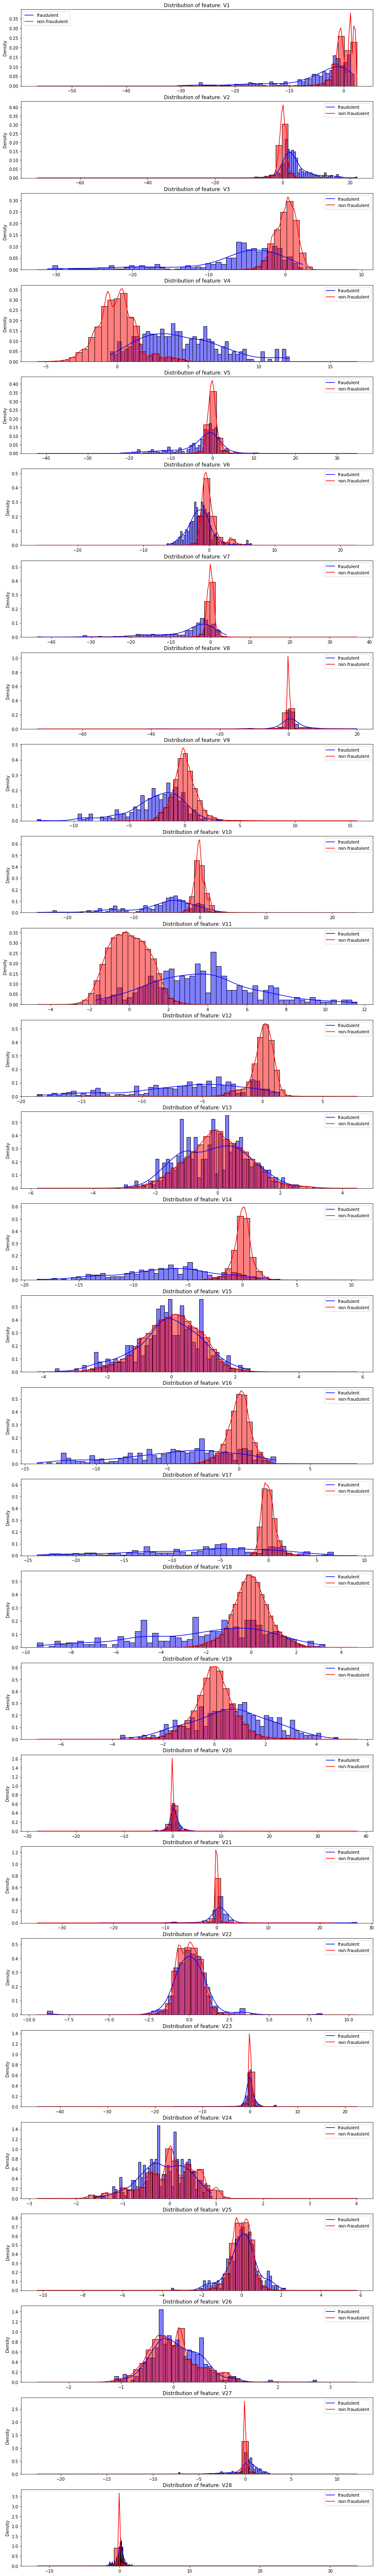

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

**Some Observations**

The graphs show the distribution of the valid and fraudulent transactions for each of the 28 features. These graphs also include density plots for both classes, which depict which interval has the most number of observations.
For many features (such as V5, V8, V15, V22) the plots for both valid and fraudulent transactions overlap. This means that the values are distributed closely and cannot be used to differentiate between the classes. Due to this, these features may not be useful for corectly classifying the transactions. For other features (such as V11, V12, V14, V17), there is relatively lower overlap between the plots and will be able to classify the transactions better.

## One Gaussian Model with Single Feature

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
# fitting regardless of class

auc_train = []
auc_val = []

gm_single = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

for i in features:
  X_train_single = X_train[i].values.reshape(-1,1)
  X_val_single = X_val[i].values.reshape(-1,1)
  gm_single.fit(X_train_single)
  p_gm_single_train = gm_single.score_samples(X_train_single)
  p_gm_single_val = gm_single.score_samples(X_val_single)

  auc_train.append(roc_auc_score(y_train, -1*p_gm_single_train))
  auc_val.append(roc_auc_score(y_val, -1*p_gm_single_val))


In [ ]:
df_single_auc = pd.DataFrame({'Feature':features, 'Training_AUC':auc_train, 'Validation_AUC': auc_val})
df_single_auc

,Feature,Training_AUC,Validation_AUC
0,V1,0.692539,0.716120
1,V2,0.848242,0.852462
2,V3,0.870005,0.856757
3,V4,0.889716,0.883281
4,V5,0.761153,0.781162
5,V6,0.727998,0.721411
6,V7,0.865496,0.887166
7,V8,0.774902,0.790328
8,V9,0.799277,0.794337
9,V10,0.910023,0.917290


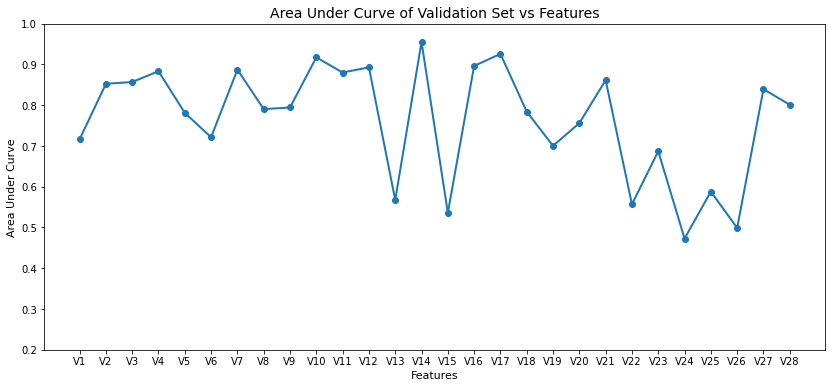

In [ ]:
# plotting auc of validation set vs features (for better understanding)

plt.figure(figsize = (14,6))
auc_val_arr = np.array(auc_val).astype(float)
plt.plot(features, auc_val_arr, linewidth = 2, marker = 'o')
plt.ylim(0.2, 1.0)
plt.xlabel('Features', fontsize = 11)
plt.ylabel('Area Under Curve', fontsize = 11)
plt.title('Area Under Curve of Validation Set vs Features', fontsize = 14)
plt.show()

In [ ]:
# finding top 3 features

index_top_3 = np.argsort(auc_val_arr)[::-1][:3]
# print(index_top_3)
best_feats = np.array(features)[index_top_3]
print('Top 3 features:',best_feats)
print('AUC of top 3 features:',np.sort(auc_val_arr)[::-1][:3])

Top 3 features: ['V14' 'V17' 'V10']
AUC of top 3 features: [0.95506601 0.92569907 0.91729007]


In [ ]:
# finding the best threshold for the best 3 features based on validation f1 score

val_scores = []
train_scores = []
best_tr = []

j = 0
for feat in best_feats:
  X_train_single = X_train[feat].values.reshape(-1,1)
  X_val_single = X_val[feat].values.reshape(-1,1)
  gm_single.fit(X_train_single)
  p_gm_single_val = gm_single.score_samples(X_val_single)
  p_gm_single_train = gm_single.score_samples(X_train_single)

  val_scores.append(p_gm_single_val)
  train_scores.append(p_gm_single_train)

  print('Minimum score sample value for {}: {:.6f}'.format(feat, min(val_scores[j])))
  print('Maximum score sample value for {}: {:.6f}'.format(feat, max(val_scores[j])))
  j += 1

  f1_scores = []
  threshold = []
  tr_range = np.arange(min(p_gm_single_val),max(p_gm_single_val),0.1)
  for tr in tr_range:
    f1_scores.append(f1_score(y_val, p_gm_single_val <= tr))
    threshold.append(tr)
  
  max_f1 = max(np.array(f1_scores))
  ind1 = np.argwhere(np.array(f1_scores) == max_f1)
  print('Best f1 score for {}: {:.6f}'.format(feat, max_f1))
  print('Corresponding threshold: {:.6f}'.format(threshold[ind1[0,0]]))
  best_tr.append(threshold[ind1[0,0]])
  print()

Minimum score sample value for V14: -186.898249
Maximum score sample value for V14: -0.876871
Best f1 score for V14: 0.619289
Corresponding threshold: -19.398249

Minimum score sample value for V17: -325.233975
Maximum score sample value for V17: -0.753270
Best f1 score for V17: 0.597701
Corresponding threshold: -22.033975

Minimum score sample value for V10: -165.897480
Maximum score sample value for V10: -1.007201
Best f1 score for V10: 0.212963
Corresponding threshold: -27.797480



In [ ]:
# finding the precision, recall and f1 score of training and validation set
train_pr = []
val_pr = []
train_rc = []
val_rc =[]
train_f1 = []
val_f1 = []

k = 0

for feat in best_feats:
  tr = best_tr[k]
  train_pr.append(precision_score(y_train, train_scores[k] <= tr))
  val_pr.append(precision_score(y_val, val_scores[k] <= tr))
  train_rc.append(recall_score(y_train, train_scores[k] <= tr))
  val_rc.append(recall_score(y_val, val_scores[k] <= tr))
  train_f1.append(f1_score(y_train, train_scores[k] <= tr))
  val_f1.append(f1_score(y_val, val_scores[k] <= tr))
  k += 1

In [ ]:
# tabulating results for metrics (regardless of class)
df_single = pd.DataFrame({'Feature': best_feats, 'Threshold': best_tr, 
                          'Training_F1_Score': train_f1, 'Validation_F1_Score': val_f1,
                          'Training_Precision': train_pr, 'Validation_Precision': val_pr,
                          'Training_Recall': train_rc, 'Validation_Recall': val_rc})

df_single

,Feature,Threshold,Training_F1_Score,Validation_F1_Score,Training_Precision,Validation_Precision,Training_Recall,Validation_Recall
0,V14,-19.398249,0.598706,0.619289,0.625000,0.642105,0.574534,0.598039
1,V17,-22.033975,0.564374,0.597701,0.653061,0.722222,0.496894,0.509804
2,V10,-27.797480,0.207084,0.212963,0.184466,0.201754,0.236025,0.225490


In [ ]:
# b. based on class(non-fraudulent)

# finding auc and threshold for top 3 features 

val_scores_nf = []
train_scores_nf = []
best_tr_nf = []
auc_train_nf = []
auc_val_nf = []

j = 0

gm_single_nf = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

for feat in best_feats:
  X_train_single_nf = X_train[feat][y_train == 0].values.reshape(-1,1)
  X_val_single_nf = X_val[feat].values.reshape(-1,1)

  gm_single_nf.fit(X_train_single_nf)

  p_gm_single_train_nf = gm_single_nf.score_samples(X_train[feat].values.reshape(-1,1))
  p_gm_single_val_nf = gm_single_nf.score_samples(X_val_single_nf)

  auc_train_nf.append(roc_auc_score(y_train, -1*p_gm_single_train_nf))
  auc_val_nf.append(roc_auc_score(y_val, -1*p_gm_single_val_nf))

  val_scores_nf.append(p_gm_single_val_nf)
  train_scores_nf.append(p_gm_single_train_nf)

  print('Minimum score sample value for {}: {:.6f}'.format(feat, min(val_scores_nf[j])))
  print('Maximum score sample value for {}: {:.6f}'.format(feat, max(val_scores_nf[j])))
  j += 1

  f1_scores_nf = []
  threshold_nf = []

  tr_range = np.arange(min(p_gm_single_val_nf),max(p_gm_single_val_nf),0.1)
  for tr in tr_range:
    f1_scores_nf.append(f1_score(y_val, p_gm_single_val_nf <= tr))
    threshold_nf.append(tr)
  
  max_f1_nf = max(np.array(f1_scores_nf))
  ind2 = np.argwhere(np.array(f1_scores_nf) == max_f1_nf)
  print('Best f1 score for {}: {:.6f}'.format(feat, max_f1_nf))
  print('Corresponding threshold: {:.6f}'.format(threshold_nf[ind2[0,0]]))
  best_tr_nf.append(threshold_nf[ind2[0,0]])
  print()


Minimum score sample value for V14: -213.292353
Maximum score sample value for V14: -0.811023
Best f1 score for V14: 0.619289
Corresponding threshold: -21.992353

Minimum score sample value for V17: -413.126367
Maximum score sample value for V17: -0.633791
Best f1 score for V17: 0.597701
Corresponding threshold: -27.626367

Minimum score sample value for V10: -180.578233
Maximum score sample value for V10: -0.964932
Best f1 score for V10: 0.212963
Corresponding threshold: -30.278233



In [ ]:
# finding the precision, recall and f1 score for training and validation 

train_pr_nf = []
val_pr_nf = []
train_rc_nf = []
val_rc_nf = []
train_f1_nf = []
val_f1_nf = []

k = 0
for feat in best_feats:
  tr = best_tr_nf[k]

  train_pr_nf.append(precision_score(y_train, train_scores_nf[k] <= tr))
  val_pr_nf.append(precision_score(y_val, val_scores_nf[k] <= tr))
  train_rc_nf.append(recall_score(y_train, train_scores_nf[k] <= tr))
  val_rc_nf.append(recall_score(y_val, val_scores_nf[k] <= tr))
  train_f1_nf.append(f1_score(y_train, train_scores_nf[k] <= tr))
  val_f1_nf.append(f1_score(y_val, val_scores_nf[k] <= tr))

  k += 1

In [ ]:
# tabiuating results for metrics (non-fraudulent class only)
df_single_nf = pd.DataFrame({'Feature': best_feats, 'Threshold': best_tr_nf, 
                             'Training_AUC': auc_train_nf, 'Validation_AUC': auc_val_nf,
                             'Training_F1_Score': train_f1_nf, 'Validation_F1_Score': val_f1_nf,
                          'Training_Precision': train_pr_nf, 'Validation_Precision': val_pr_nf,
                          'Training_Recall': train_rc_nf, 'Validation_Recall': val_rc_nf})

df_single_nf

,Feature,Threshold,Training_AUC,Validation_AUC,Training_F1_Score,Validation_F1_Score,Training_Precision,Validation_Precision,Training_Recall,Validation_Recall
0,V14,-21.992353,0.948317,0.954916,0.598706,0.619289,0.625000,0.642105,0.574534,0.598039
1,V17,-27.626367,0.928398,0.925267,0.565371,0.597701,0.655738,0.722222,0.496894,0.509804
2,V10,-30.278233,0.910166,0.917277,0.207934,0.212963,0.185819,0.201754,0.236025,0.225490


In [ ]:
# tabulating results for comparison

df_single_1 = pd.DataFrame([np.array(auc_train)[index_top_3]], index = [['AUC'],['training'], ['all']])
df_single_nf1 = pd.DataFrame([np.array(auc_train_nf)], index = [['AUC'],['training'], ['non-fraud']])
df_single_2 = pd.DataFrame([np.array(auc_val)[index_top_3]], index = [['AUC'],['validation'], ['all']])
df_single_nf2 = pd.DataFrame([np.array(auc_val_nf)], index = [['AUC'],['validation'], ['non-fraud ']])

df_single_3 = pd.DataFrame([np.array(train_pr)], index = [['Precision'],['training'], ['all']])
df_single_nf3 = pd.DataFrame([np.array(train_pr_nf)], index = [['Precision'],['training'], ['non-fraud']])
df_single_4 = pd.DataFrame([np.array(val_pr)], index = [['Precision'],['validation'], ['all']])
df_single_nf4 = pd.DataFrame([np.array(val_pr_nf)], index = [['Precision'],['validation'], ['non-fraud ']])

df_single_5 = pd.DataFrame([np.array(train_rc)], index = [['Recall'],['training'], ['all']])
df_single_nf5 = pd.DataFrame([np.array(train_rc_nf)], index = [['Recall'],['training'], ['non-fraud']])
df_single_6 = pd.DataFrame([np.array(val_rc)], index = [['Recall'],['validation'], ['all']])
df_single_nf6 = pd.DataFrame([np.array(val_rc_nf)], index = [['Recall'],['validation'], ['non-fraud ']])

df_single_7 = pd.DataFrame([np.array(train_f1)], index = [['F1 Score'],['training'], ['all']])
df_single_nf7 = pd.DataFrame([np.array(train_f1_nf)], index = [['F1 Score'],['training'], ['non-fraud']])
df_single_8 = pd.DataFrame([np.array(val_f1)], index = [['F1 Score'],['validation'], ['all']])
df_single_nf8 = pd.DataFrame([np.array(val_f1_nf)], index = [['F1 Score'],['validation'], ['non-fraud']])

df_single_9 = pd.DataFrame([np.array(best_tr)], index = [['Threshold'],[''],['all']])
df_single_nf9 = pd.DataFrame([np.array(best_tr_nf)], index = [['Threshold'],[''],['non-fraud']])


df_single_final = pd.concat([df_single_1, df_single_nf1, df_single_2, df_single_nf2, df_single_3, df_single_nf3, df_single_4, df_single_nf4,
                             df_single_5, df_single_nf5, df_single_6, df_single_nf6, df_single_7, df_single_nf7, df_single_8, df_single_nf8,
                             df_single_9, df_single_nf9])

df_single_final.columns = best_feats
df_single_final

V14        V17        V10
AUC       training   all          0.948014   0.928937   0.910023
                     non-fraud    0.948317   0.928398   0.910166
          validation all          0.955066   0.925699   0.917290
                     non-fraud    0.954916   0.925267   0.917277
Precision training   all          0.625000   0.653061   0.184466
                     non-fraud    0.625000   0.655738   0.185819
          validation all          0.642105   0.722222   0.201754
                     non-fraud    0.642105   0.722222   0.201754
Recall    training   all          0.574534   0.496894   0.236025
                     non-fraud    0.574534   0.496894   0.236025
          validation all          0.598039   0.509804   0.225490
                     non-fraud    0.598039   0.509804   0.225490
F1 Score  training   all          0.598706   0.564374   0.207084
                     non-fraud    0.598706   0.565371   0.207934
          validation all          0.619289   0.597701   0.212963
                     non-fraud    0.619289   0.597701   0.212963
Threshold            all        -19.398249 -22.033975 -27.797480
                     non-fraud  -21.992353 -27.626367 -30.278233

## One Gaussian Model with Multiple Features

In [ ]:
# a. 2D plots

# function for scatter plot using training set

def scatter_plot(feats, X_train, y_train):
  plt.scatter(X_train[feats[0]][y_train == 0], X_train[feats[1]][y_train == 0], label = 'non-fraud', c = 'b')
  plt.scatter(X_train[feats[0]][y_train == 1], X_train[feats[1]][y_train == 1], label = 'fraud', c  = 'r')
  plt.xlabel(feats[0])
  plt.ylabel(feats[1])
  plt.legend()
  plt.show()

In [ ]:
# function for calculating training and validation auc scores

def auc_calc(n, feats, X_train, X_val, y_train, y_val):

  gm_single_2f = GaussianMixture(n_components = n, covariance_type = 'full', random_state = 0)
  X_train_2f = X_train.loc[:,feats].values
  X_val_2f = X_val.loc[:, feats].values

  gm_single_2f.fit(X_train_2f)
  
  p_train_2f = gm_single_2f.score_samples(X_train_2f)
  p_val_2f = gm_single_2f.score_samples(X_val_2f)

  auc_train = roc_auc_score(y_train, -1*p_train_2f)
  auc_val = roc_auc_score(y_val, -1*p_val_2f)

  print('AUC of Training Score for {}: {}'.format(feats,auc_train))
  print('AUC of Validation Score for {}: {}'.format(feats,auc_val))

In [ ]:
#function to maximize f1 score for the best combination of features

def maximize_f1(n, best_feats,X_train, X_val, y_train, y_val):    
  f1_scores = []
  threshold = []

  gm_single_2f = GaussianMixture(n_components = n, covariance_type = 'full', random_state = 0)

  X_train_2f_best = X_train.loc[:,best_feats].values
  X_val_2f_best = X_val.loc[:, best_feats].values
  gm_single_2f.fit(X_train_2f_best)
  p_train_2f_best = gm_single_2f.score_samples(X_train_2f_best)
  p_val_2f_best = gm_single_2f.score_samples(X_val_2f_best)

  tr_range = np.arange(min(p_val_2f_best),max(p_val_2f_best),0.1)
  for tr in tr_range:
    f1_scores.append(f1_score(y_val, p_val_2f_best <= tr))
    threshold.append(tr)
  
  max_f1 = max(np.array(f1_scores))
  ind3 = np.argwhere(np.array(f1_scores) == max_f1)
  best_threshold = threshold[ind3[0,0]]
  print('Best F1 score for features {}: {}'.format(best_feats, max_f1))
  print('Corresponding threshold: {}'.format(best_threshold))
  return max_f1, best_threshold, p_train_2f_best, p_val_2f_best

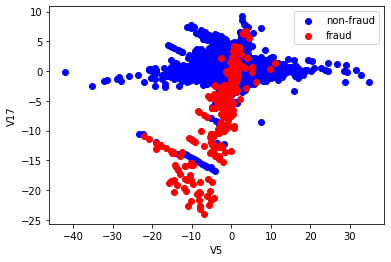

In [ ]:
# set 1: [5, 17]

features1 = ['V5', 'V17']
scatter_plot(features1, X_train, y_train)

In [ ]:
n1 = 1    #based on the scatter plot
auc_calc(n1,features1,X_train,X_val,y_train,y_val)

AUC of Training Score for ['V5', 'V17']: 0.9315660890981458
AUC of Validation Score for ['V5', 'V17']: 0.9234144386750989


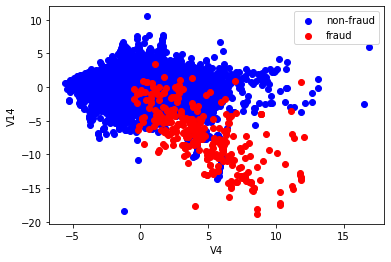

In [ ]:
# set 2: [4,14]

features2 = ['V4', 'V14']
scatter_plot(features2, X_train, y_train)

In [ ]:
n2 = 1    #based on the scatter plot
auc_calc(n2,features2,X_train,X_val,y_train,y_val)

AUC of Training Score for ['V4', 'V14']: 0.9609814055815722
AUC of Validation Score for ['V4', 'V14']: 0.9614015957602724


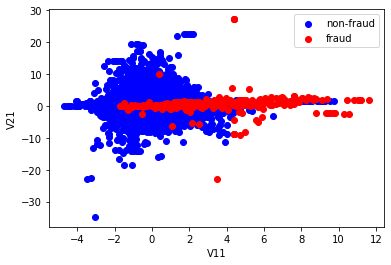

In [ ]:
# set 3: [11,21]

features3 = ['V11', 'V21']
scatter_plot(features3, X_train, y_train)

In [ ]:
n3 = 1    #based on the scatter plot
auc_calc(n3,features3,X_train,X_val,y_train,y_val)

AUC of Training Score for ['V11', 'V21']: 0.9019534319793399
AUC of Validation Score for ['V11', 'V21']: 0.8994728618333139


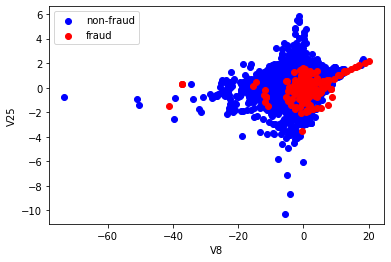

In [ ]:
# set 4: [8,25]

features4 = ['V8','V25']
scatter_plot(features4, X_train, y_train)

In [ ]:
n4 = 1    #based on the scatter plot
auc_calc(n4,features4,X_train,X_val,y_train,y_val)

AUC of Training Score for ['V8', 'V25']: 0.743667202386358
AUC of Validation Score for ['V8', 'V25']: 0.7792385636433297


In [ ]:
# calling the mazimize_f1 function on set 2, as it has the best validation AUC
max_f1, tr_best, p_train_best, p_val_best = maximize_f1(n2,features2,X_train, X_val, y_train, y_val)

Best F1 score for features ['V4', 'V14']: 0.6206896551724137
Corresponding threshold: -23.93322851809785


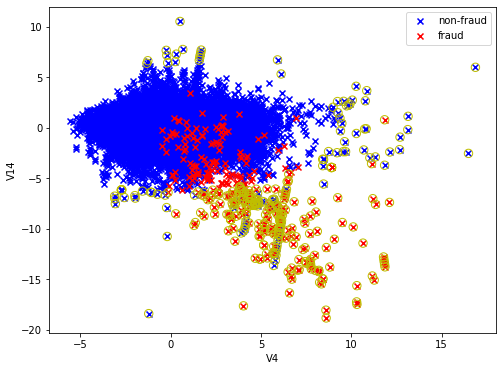

In [ ]:
# plot for training set of set 2 with outliers

plt.figure(figsize = (8,6))
plt.scatter(X_train[features2[0]][y_train == 0], X_train[features2[1]][y_train == 0], marker = 'x', label = 'non-fraud', c = 'b')
plt.scatter(X_train[features2[0]][y_train == 1], X_train[features2[1]][y_train == 1], marker = 'x', label = 'fraud', c  = 'r')

plt.xlabel(features2[0])
plt.ylabel(features2[1])

outliers = np.nonzero(p_train_best < tr_best)[0]
plt.scatter(X_train[features2[0]].iloc[outliers], X_train[features2[1]].iloc[outliers], marker = 'o', facecolor = 'none', edgecolor = 'y', s = 70)

plt.legend()
plt.show()

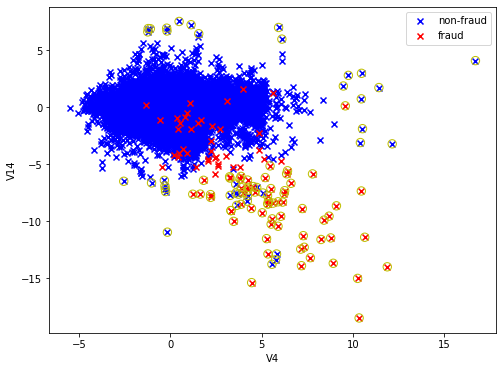

In [ ]:
# plot for validation set of set 2 with outliers
plt.figure(figsize = (8,6))
plt.scatter(X_val[features2[0]][y_val == 0], X_val[features2[1]][y_val == 0], marker = 'x', label = 'non-fraud', c = 'b')
plt.scatter(X_val[features2[0]][y_val == 1], X_val[features2[1]][y_val == 1], marker = 'x', label = 'fraud', c  = 'r')

plt.xlabel(features2[0])
plt.ylabel(features2[1])


outliers = np.nonzero(p_val_best < tr_best)[0]
plt.scatter(X_val[features2[0]].iloc[outliers], X_val[features2[1]].iloc[outliers], marker = 'o', facecolor = 'none', edgecolor = 'y', s = 70)

plt.legend()
plt.show()

In [ ]:
# b. 3D plots
###You can use the following function for 3D plotting in part b  ###

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure(figsize=(10,8))
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='b', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.title('{}$^\circ$'.format(angle), y=1.03)
  plt.show()
  print()


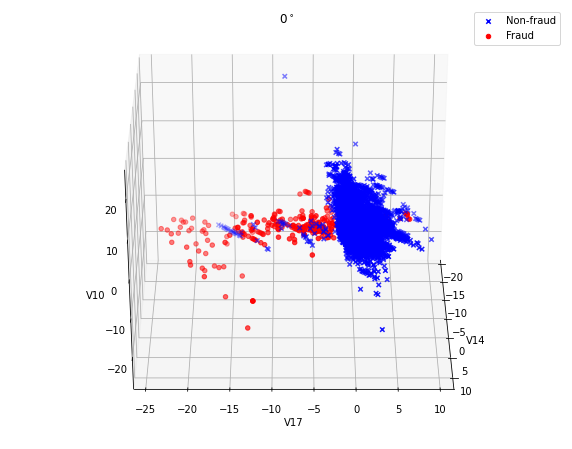

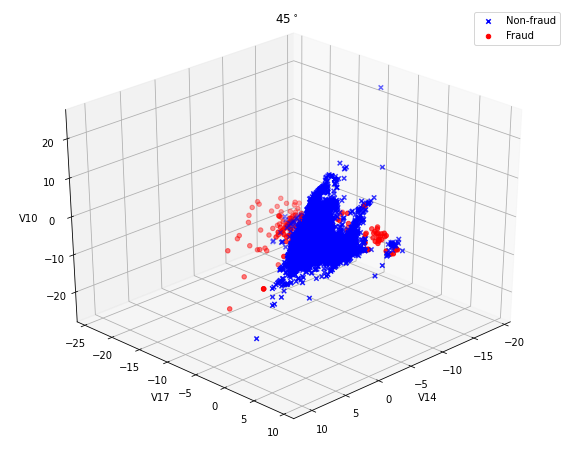

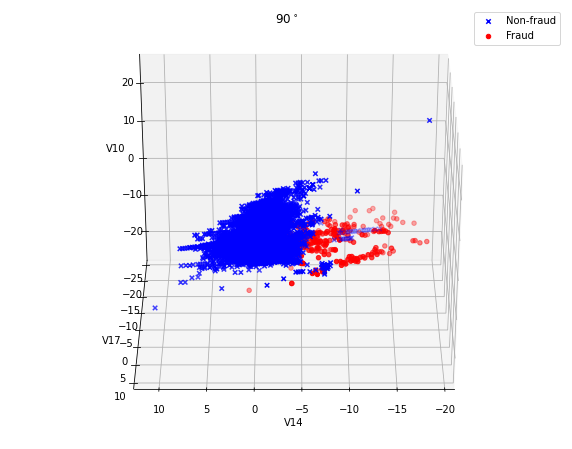

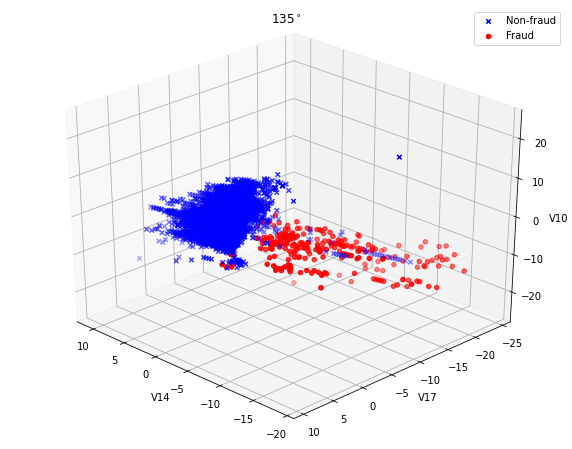

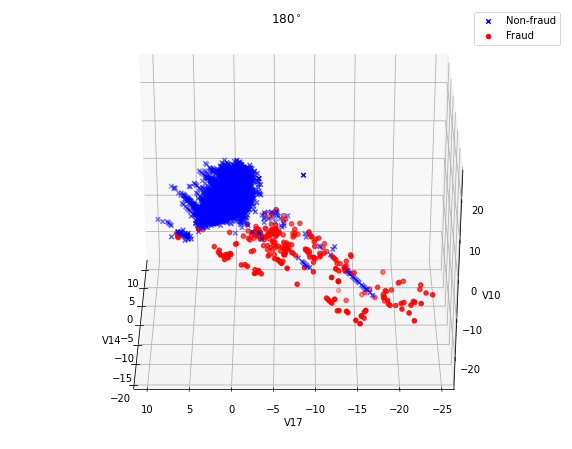

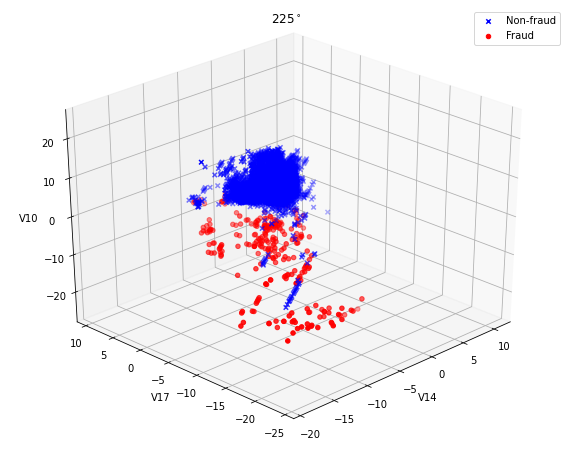

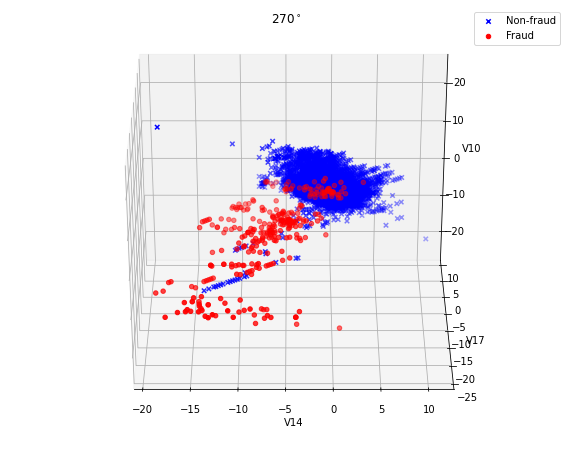

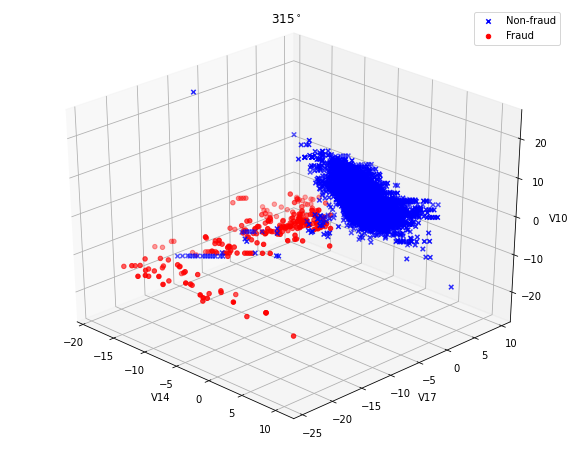

In [ ]:
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=0)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=45)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=90)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=135)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=180)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=225)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=270)
plot_3d(X_train, y_train, f1="V14", f2="V17", f3="V10", angle=315)

In [ ]:
# the top 3 features with best validation AUC from part 2
features_3d = ['V14', 'V17', 'V10']
n_3d = 1    # from the 3d plots 

In [ ]:
auc_calc(n_3d, features_3d, X_train, X_val, y_train, y_val)

AUC of Training Score for ['V14', 'V17', 'V10']: 0.9575829050813558
AUC of Validation Score for ['V14', 'V17', 'V10']: 0.9649251036878636


In [ ]:
max_f1_3d, tr_best_3d, p_train_best_3d, p_val_best_3d = maximize_f1(n_3d, features_3d, X_train, X_val, y_train, y_val)

Best F1 score for features ['V14', 'V17', 'V10']: 0.5999999999999999
Corresponding threshold: -65.47008105004784


## Two Gaussian Model with Single Feature

In [ ]:
# for one feature, V17

g1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
g2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

X_train_valid_V17 = X_train['V17'][y_train == 0].values.reshape(-1,1)
X_train_fraud_V17 = X_train['V17'][y_train == 1].values.reshape(-1,1)
X_val_V17 = X_val['V17'].values.reshape(-1,1)

g1.fit(X_train_valid_V17)
g2.fit(X_train_fraud_V17)

s1 = g1.score_samples(X_val_V17)
s2 = g2.score_samples(X_val_V17)

f1_V17 = []
c_V17 = []

for c in np.arange(0,10,0.1):
  f1_V17.append(f1_score(y_val, s1 < c*s2))
  c_V17.append(c)

  max_f1_V17 = max(np.array(f1_V17))
  index_c_V17 = np.argwhere(np.array(f1_V17) == max_f1_V17)
  best_c_V17 = c_V17[index_c_V17[0,0]]

print('Maximum F1 score for V17 = {:.6f} is obtained at c = {}'.format(max_f1_V17, best_c_V17))

Maximum F1 score for V17 = 0.670157 is obtained at c = 5.9


In [ ]:
# for all features

g1 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
g2 = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)

train_precision = []
val_precision = []
train_recall =[]
val_recall = []
train_f1_score = []
val_f1_score = []

c_values_all = []

for i in features:
  X_train_valid = X_train[i][y_train == 0].values.reshape(-1,1)
  X_val_valid = X_val[i].values.reshape(-1,1)
  g1.fit(X_train_valid)
  s1_train = g1.score_samples(X_train[i].values.reshape(-1,1))
  s1 = g1.score_samples(X_val_valid)


  X_train_fraud = X_train[i][y_train == 1].values.reshape(-1,1)
  X_val_fraud = X_val[i].values.reshape(-1,1)
  g2.fit(X_train_fraud)
  s2_train = g2.score_samples(X_train[i].values.reshape(-1,1))
  s2 = g2.score_samples(X_val_fraud)

  f1_scores = []
  c_values = []

  c_range = np.arange(0,10,0.1)
  for c in c_range:
    f1_scores.append(f1_score(y_val, s1 < c*s2))
    c_values.append(c)

  max_f1 = max(np.array(f1_scores))
  index_c = np.argwhere(np.array(f1_scores) == max_f1)
  best_c = c_values[index_c[0,0]]

  val_f1_score.append(max_f1)
  c_values_all.append(best_c)

  train_f1_score.append(f1_score(y_train, s1_train < best_c*s2_train))
  train_precision.append(precision_score(y_train, s1_train < best_c*s2_train))
  val_precision.append(precision_score(y_val, s1 < best_c*s2))
  train_recall.append(recall_score(y_train, s1_train < best_c*s2_train))
  val_recall.append(recall_score(y_val, s1 < best_c*s2))

In [ ]:
df_single_2gauss_final = pd.DataFrame({'Feature': features,
                    'Best_C': c_values_all,
                    'Training_F1_Score': train_f1_score,
                    'Validation_F1_Score': val_f1_score,
                    'Training_Precision': train_precision,
                    'Validation_Precision': val_precision,
                    'Training_Recall': train_recall,
                    'Validation_Recall': val_recall})

df_single_2gauss_final

,Feature,Best_C,Training_F1_Score,Validation_F1_Score,Training_Precision,Validation_Precision,Training_Recall,Validation_Recall
0,V1,6.6,0.128440,0.152381,0.126506,0.148148,0.130435,0.156863
1,V2,5.9,0.127778,0.175439,0.605263,0.833333,0.071429,0.098039
2,V3,7.6,0.268714,0.312139,0.351759,0.380282,0.217391,0.264706
3,V4,4.2,0.355958,0.377358,0.346041,0.363636,0.366460,0.392157
4,V5,8.3,0.164706,0.193939,0.223404,0.253968,0.130435,0.156863
5,V6,1.9,0.100000,0.118812,0.067164,0.079470,0.195652,0.235294
6,V7,8.5,0.236364,0.236967,0.230769,0.229358,0.242236,0.245098
7,V8,6.9,0.063694,0.104167,0.048387,0.080645,0.093168,0.147059
8,V9,3.4,0.406321,0.448980,0.743802,0.733333,0.279503,0.323529
9,V10,6.8,0.383803,0.397590,0.443089,0.515625,0.338509,0.323529


In [ ]:
# finding maximum values for precision, recall and f1 score for training and validation set, with corresponding feature and c value
col_name = list(df_single_2gauss_final)

for col_num in range(2,8):
  col_obj = df_single_2gauss_final.iloc[:, col_num]
  maximum_value = max(np.array(col_obj))
  c_col = df_single_2gauss_final.iloc[:,1].values.tolist()
  feat_col = df_single_2gauss_final.iloc[:,0].values.tolist()
  c_ind = np.argwhere(np.array(col_obj) == maximum_value)
  print('Maximum value of {}\t= {:.6f} for {} and c = {:.1f}'.format(col_name[col_num],maximum_value,feat_col[c_ind[0,0]], c_col[c_ind[0,0]]))

Maximum value of Training_F1_Score	= 0.673540 for V12 and c = 4.4
Maximum value of Validation_F1_Score	= 0.670157 for V17 and c = 5.9
Maximum value of Training_Precision	= 0.770053 for V16 and c = 5.2
Maximum value of Validation_Precision	= 0.885714 for V18 and c = 5.1
Maximum value of Training_Recall	= 0.639752 for V14 and c = 7.0
Maximum value of Validation_Recall	= 0.666667 for V14 and c = 7.0


## Multivariate and Mixture of Gaussian Disributions

In [ ]:
#function for model with a combination of two gaussians (from part 4)

def multi_gauss_mix(n1, n2, feats, X_train, X_val, y_train, y_val):
  val_f1_score_multi = []
  c_values_all_multi = []

  g1 = GaussianMixture(n_components = n1, covariance_type = 'full', random_state = 0)
  g2 = GaussianMixture(n_components = n2, covariance_type = 'full', random_state = 0)
  
  X_train_valid_multi = X_train.loc[:,feats][y_train == 0].values
  X_train_fraud_multi = X_train.loc[:,feats][y_train == 1].values
  X_val_common_multi = X_val.loc[:,feats].values
  X_train_common_multi = X_train.loc[:,feats].values

  g1.fit(X_train_valid_multi)
  g2.fit(X_train_fraud_multi)

  s1_train_multi = g1.score_samples(X_train_common_multi)
  s1_val_multi = g1.score_samples(X_val_common_multi)
  s2_train_multi = g2.score_samples(X_train_common_multi)
  s2_val_multi = g2.score_samples(X_val_common_multi)

  f1_scores_multi = []
  c_values_multi = []

  c_range = np.arange(0,10,0.1)
  for c in c_range:
    f1_scores_multi.append(f1_score(y_val, s1_val_multi < c*s2_val_multi))
    c_values_multi.append(c)

  max_f1_multi = max(np.array(f1_scores_multi))
  index_c_multi = np.argwhere(np.array(f1_scores_multi) == max_f1_multi)
  best_c_multi = c_values_multi[index_c_multi[0,0]]

  val_f1_score_multi.append(format(max_f1_multi,'.6f'))
  c_values_all_multi.append(format(best_c_multi,'.1f'))

  train_f1_score_multi = f1_score(y_train, s1_train_multi < best_c_multi*s2_train_multi)
  train_precision_multi = precision_score(y_train, s1_train_multi < best_c_multi*s2_train_multi)
  val_precision_multi = precision_score(y_val, s1_val_multi < best_c_multi*s2_val_multi)
  train_recall_multi = recall_score(y_train, s1_train_multi < best_c_multi*s2_train_multi)
  val_recall_multi = recall_score(y_val, s1_val_multi < best_c_multi*s2_val_multi)
  return n1, n2, best_c_multi, train_f1_score_multi, max_f1_multi, train_precision_multi, val_precision_multi, train_recall_multi, val_recall_multi

In [ ]:
#selecting top 2 features based on validation f1 score from part 4
top_2_selected = np.array(val_f1_score).argsort()[-2:][::-1]
top_2_feats = np.array(features)[top_2_selected]
model_results_2f = []

for n2 in range(2,11):
  model_results_2f.append(multi_gauss_mix(1,n2,top_2_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_2f = pd.DataFrame(model_results_2f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_2f.insert(loc = 0, column = 'Features', value = '[V17, V12]')
df_multi_2f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12]",1,2,4.5,0.694190,0.707692,0.683735,0.741935,0.704969,0.676471
1,"[V17, V12]",1,3,5.1,0.727273,0.737430,0.777385,0.857143,0.683230,0.647059
2,"[V17, V12]",1,4,5.1,0.715928,0.706522,0.759582,0.792683,0.677019,0.637255
3,"[V17, V12]",1,5,4.3,0.726415,0.725389,0.735669,0.769231,0.717391,0.686275
4,"[V17, V12]",1,6,4.9,0.716561,0.729282,0.735294,0.835443,0.698758,0.647059
5,"[V17, V12]",1,7,5.0,0.729032,0.726257,0.758389,0.844156,0.701863,0.637255
6,"[V17, V12]",1,8,5.0,0.729032,0.733333,0.758389,0.846154,0.701863,0.647059
7,"[V17, V12]",1,9,4.5,0.750000,0.739130,0.797203,0.829268,0.708075,0.666667
8,"[V17, V12]",1,10,4.5,0.754098,0.739130,0.798611,0.829268,0.714286,0.666667


In [ ]:
#selecting top 3 features based on validation f1 score from part 4
top_3_selected = np.array(val_f1_score).argsort()[-3:][::-1]
top_3_feats = np.array(features)[top_3_selected]
model_results_3f = []

for n2 in range(2,11):
  model_results_3f.append(multi_gauss_mix(1,n2,top_3_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_3f = pd.DataFrame(model_results_3f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_3f.insert(loc = 0, column = 'Features', value = '[V17, V12, V14]')
df_multi_3f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12, V14]",1,2,7.2,0.764608,0.789189,0.826715,0.879518,0.711180,0.715686
1,"[V17, V12, V14]",1,3,6.9,0.767974,0.806452,0.810345,0.892857,0.729814,0.735294
2,"[V17, V12, V14]",1,4,7.1,0.767213,0.806452,0.812500,0.892857,0.726708,0.735294
3,"[V17, V12, V14]",1,5,7.0,0.777778,0.800000,0.820690,0.891566,0.739130,0.725490
4,"[V17, V12, V14]",1,6,7.1,0.785016,0.810811,0.825342,0.903614,0.748447,0.735294
5,"[V17, V12, V14]",1,7,6.1,0.771822,0.795918,0.761329,0.829787,0.782609,0.764706
6,"[V17, V12, V14]",1,8,6.9,0.777419,0.791444,0.808725,0.870588,0.748447,0.725490
7,"[V17, V12, V14]",1,9,7.9,0.777963,0.797814,0.841155,0.901235,0.723602,0.715686
8,"[V17, V12, V14]",1,10,5.1,0.809892,0.815920,0.806154,0.828283,0.813665,0.803922


In [ ]:
#selecting top 4 features based on validation f1 score from part 4
top_4_selected = np.array(val_f1_score).argsort()[-4:][::-1]
top_4_feats = np.array(features)[top_4_selected]
model_results_4f = []

for n2 in range(2,11):
  model_results_4f.append(multi_gauss_mix(1,n2,top_4_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_4f = pd.DataFrame(model_results_4f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_4f.insert(loc = 0, column = 'Features', value = '[V17, V12, V14, V11]')
df_multi_4f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12, V14, V11]",1,2,7.5,0.763514,0.797814,0.837037,0.901235,0.701863,0.715686
1,"[V17, V12, V14, V11]",1,3,7.1,0.774834,0.806452,0.829787,0.892857,0.726708,0.735294
2,"[V17, V12, V14, V11]",1,4,6.2,0.779014,0.819149,0.798046,0.895349,0.760870,0.754902
3,"[V17, V12, V14, V11]",1,5,6.6,0.775444,0.804233,0.808081,0.873563,0.745342,0.745098
4,"[V17, V12, V14, V11]",1,6,5.4,0.768293,0.804020,0.754491,0.824742,0.782609,0.784314
5,"[V17, V12, V14, V11]",1,7,5.4,0.801887,0.816327,0.812102,0.851064,0.791925,0.784314
6,"[V17, V12, V14, V11]",1,8,5.4,0.799373,0.816327,0.806962,0.851064,0.791925,0.784314
7,"[V17, V12, V14, V11]",1,9,5.4,0.799373,0.816327,0.806962,0.851064,0.791925,0.784314
8,"[V17, V12, V14, V11]",1,10,5.4,0.799373,0.816327,0.806962,0.851064,0.791925,0.784314


In [ ]:
#selecting top 5 features based on validation f1 score from part 4
top_5_selected = np.array(val_f1_score).argsort()[-5:][::-1]
top_5_feats = np.array(features)[top_5_selected]
model_results_5f = []

for n2 in range(2,11):
  model_results_5f.append(multi_gauss_mix(1,n2,top_5_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_5f = pd.DataFrame(model_results_5f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_5f.insert(loc = 0, column = 'Features', value = '[V17, V12, V14, V11, V16]')
df_multi_5f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12, V14, V11, V16]",1,2,8.1,0.763514,0.797814,0.837037,0.901235,0.701863,0.715686
1,"[V17, V12, V14, V11, V16]",1,3,6.7,0.781102,0.810526,0.792332,0.875000,0.770186,0.754902
2,"[V17, V12, V14, V11, V16]",1,4,6.3,0.780715,0.812500,0.781931,0.866667,0.779503,0.764706
3,"[V17, V12, V14, V11, V16]",1,5,6.7,0.779874,0.812500,0.789809,0.866667,0.770186,0.764706
4,"[V17, V12, V14, V11, V16]",1,6,6.1,0.800633,0.808290,0.816129,0.857143,0.785714,0.764706
5,"[V17, V12, V14, V11, V16]",1,7,5.6,0.790698,0.814070,0.789474,0.835052,0.791925,0.794118
6,"[V17, V12, V14, V11, V16]",1,8,5.7,0.819048,0.824742,0.837662,0.869565,0.801242,0.784314
7,"[V17, V12, V14, V11, V16]",1,9,5.6,0.815166,0.824742,0.829582,0.869565,0.801242,0.784314
8,"[V17, V12, V14, V11, V16]",1,10,5.3,0.811146,0.818182,0.808642,0.843750,0.813665,0.794118


In [ ]:
#selecting top 6 features based on validation f1 score from part 4
top_6_selected = np.array(val_f1_score).argsort()[-6:][::-1]
top_6_feats = np.array(features)[top_6_selected]
model_results_6f = []

for n2 in range(2,11):
  model_results_6f.append(multi_gauss_mix(1,n2,top_6_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_6f = pd.DataFrame(model_results_6f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_6f.insert(loc = 0, column = 'Features', value = '[V17, V12, V14, V11, V16, V18]')
df_multi_6f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12, V14, V11, V16, V18]",1,2,6.6,0.760697,0.785714,0.776699,0.819149,0.745342,0.754902
1,"[V17, V12, V14, V11, V16, V18]",1,3,5.9,0.774390,0.810256,0.760479,0.849462,0.788820,0.774510
2,"[V17, V12, V14, V11, V16, V18]",1,4,5.9,0.775573,0.810256,0.762763,0.849462,0.788820,0.774510
3,"[V17, V12, V14, V11, V16, V18]",1,5,6.1,0.778295,0.816327,0.777090,0.851064,0.779503,0.784314
4,"[V17, V12, V14, V11, V16, V18]",1,6,6.3,0.794953,0.795812,0.807692,0.853933,0.782609,0.745098
5,"[V17, V12, V14, V11, V16, V18]",1,7,6.2,0.808917,0.812500,0.830065,0.866667,0.788820,0.764706
6,"[V17, V12, V14, V11, V16, V18]",1,8,5.4,0.792627,0.820000,0.784195,0.836735,0.801242,0.803922
7,"[V17, V12, V14, V11, V16, V18]",1,9,5.9,0.816000,0.814433,0.841584,0.858696,0.791925,0.774510
8,"[V17, V12, V14, V11, V16, V18]",1,10,6.5,0.809600,0.810526,0.834983,0.875000,0.785714,0.754902


In [ ]:
#selecting top 7 features based on validation f1 score from part 4
top_7_selected = np.array(val_f1_score).argsort()[-7:][::-1]
top_7_feats = np.array(features)[top_7_selected]
model_results_7f = []

for n2 in range(2,11):
  model_results_7f.append(multi_gauss_mix(1,n2,top_7_feats,X_train, X_val, y_train, y_val))

In [ ]:
df_multi_7f = pd.DataFrame(model_results_7f, columns = ['n1','n2','Best_c','Training_F1_Score','Validation_F1_Score','Training_Precison','Validation_Precision', 'Training_Recall','Validation_Recall'])
df_multi_7f.insert(loc = 0, column = 'Features', value = '[V17, V12, V14, V11, V16, V18, V9]')
df_multi_7f

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12, V14, V11, V16, V18, V9]",1,2,7.1,0.760797,0.780749,0.817857,0.858824,0.711180,0.715686
1,"[V17, V12, V14, V11, V16, V18, V9]",1,3,5.5,0.783951,0.802030,0.779141,0.831579,0.788820,0.774510
2,"[V17, V12, V14, V11, V16, V18, V9]",1,4,6.2,0.767516,0.800000,0.787582,0.863636,0.748447,0.745098
3,"[V17, V12, V14, V11, V16, V18, V9]",1,5,5.8,0.777605,0.797927,0.778816,0.846154,0.776398,0.754902
4,"[V17, V12, V14, V11, V16, V18, V9]",1,6,6.2,0.769716,0.795812,0.782051,0.853933,0.757764,0.745098
5,"[V17, V12, V14, V11, V16, V18, V9]",1,7,5.9,0.783151,0.808290,0.786834,0.857143,0.779503,0.764706
6,"[V17, V12, V14, V11, V16, V18, V9]",1,8,4.2,0.816641,0.824121,0.810398,0.845361,0.822981,0.803922
7,"[V17, V12, V14, V11, V16, V18, V9]",1,9,4.9,0.815166,0.830769,0.829582,0.870968,0.801242,0.794118
8,"[V17, V12, V14, V11, V16, V18, V9]",1,10,5.0,0.806250,0.830769,0.811321,0.870968,0.801242,0.794118


In [ ]:
#concatenating results from all models 

final_frames = [df_multi_2f, df_multi_3f, df_multi_4f, df_multi_5f, df_multi_6f, df_multi_7f]
df_multi_final = pd.concat(final_frames, ignore_index = True)
df_multi_final

,Features,n1,n2,Best_c,Training_F1_Score,Validation_F1_Score,Training_Precison,Validation_Precision,Training_Recall,Validation_Recall
0,"[V17, V12]",1,2,4.5,0.694190,0.707692,0.683735,0.741935,0.704969,0.676471
1,"[V17, V12]",1,3,5.1,0.727273,0.737430,0.777385,0.857143,0.683230,0.647059
2,"[V17, V12]",1,4,5.1,0.715928,0.706522,0.759582,0.792683,0.677019,0.637255
3,"[V17, V12]",1,5,4.3,0.726415,0.725389,0.735669,0.769231,0.717391,0.686275
4,"[V17, V12]",1,6,4.9,0.716561,0.729282,0.735294,0.835443,0.698758,0.647059
5,"[V17, V12]",1,7,5.0,0.729032,0.726257,0.758389,0.844156,0.701863,0.637255
6,"[V17, V12]",1,8,5.0,0.729032,0.733333,0.758389,0.846154,0.701863,0.647059
7,"[V17, V12]",1,9,4.5,0.750000,0.739130,0.797203,0.829268,0.708075,0.666667
8,"[V17, V12]",1,10,4.5,0.754098,0.739130,0.798611,0.829268,0.714286,0.666667
9,"[V17, V12, V14]",1,2,7.2,0.764608,0.789189,0.826715,0.879518,0.711180,0.715686


In [ ]:
# finding the best model based on validation f1 score
best_result_final = df_multi_final['Validation_F1_Score'].idxmax()
df_multi_final.loc[best_result_final]

Features                [V17, V12, V14, V11, V16, V18, V9]
n1                                                       1
n2                                                       9
Best_c                                                 4.9
Training_F1_Score                                 0.815166
Validation_F1_Score                               0.830769
Training_Precison                                 0.829582
Validation_Precision                              0.870968
Training_Recall                                   0.801242
Validation_Recall                                 0.794118
Name: 52, dtype: object

**Some Observations**

Out of the 54 models that were tested, Model #53 and #54 worked the best and had the highest validation F1 score of 0.830769. Model #53 is chosen because it gives the same result with lower number of components (n2) for the model trained with fraudulent transactions (g2). This model uses 7 features, they are V17, V12, V14, V11, V16, V18 and V9. Other parameters are n1 = 1, n2 = 9 and c = 4.9. F1 Score = 0.834532, Precision = 0.816901, Recall = 0.852941.


In [ ]:
c_value = 4.9

g1_final = GaussianMixture(n_components = 1, covariance_type = 'full', random_state = 0)
g2_final = GaussianMixture(n_components = 9, covariance_type = 'full', random_state = 0)

X_train_valid_final = X_train.loc[:,top_7_feats][y_train == 0].values
X_train_fraud_final = X_train.loc[:,top_7_feats][y_train == 1].values
X_test_final = X_test.loc[:,top_7_feats].values

g1_final.fit(X_train_valid_final)
g2_final.fit(X_train_fraud_final)

s1_final = g1_final.score_samples(X_test_final)
s2_final = g2_final.score_samples(X_test_final)

test_f1_score = f1_score(y_test, s1_final < c_value*s2_final)
test_precision = precision_score(y_test, s1_final < c_value*s2_final)
test_recall = recall_score(y_test, s1_final < c_value*s2_final)

print('Performance of the best model on the test set \n')
print('F1 Score:',test_f1_score)
print('Precision:', test_precision)
print('Recall:',test_recall)

Performance of the best model on the test set 

F1 Score: 0.8345323741007195
Precision: 0.8169014084507042
Recall: 0.8529411764705882
